### 1. Importar librerías

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

### 2. Cargar Dataset y análisis exploratorio


--- Dimensiones del dataset ---
(643194, 12)

--- Primeras filas ---
  CODIGO_PRODUCTO_FINANCIERO  TIPO_PRODUCTO_FINANCIERO  CODIGO_CUENTAHABIENTE  \
0              9600537950022                        13                     44   
1              3601324100033                         1                     47   
2             42018375900018                         1                    110   
3                     119238                         1                    110   
4             11923801487831                         1                    110   

  NOMBRE_CUENTAHABIENTE  TIPO CUENTAHABIENTE  TIPO DEUDA  SUBTIPO DEUDA  \
0         Doris Jackson                    1           3             32   
1   Sig. Rosario Tropea                    1           3             31   
2    Mr. William Foster                    1           4             42   
3    Mr. William Foster                    1           4             43   
4    Mr. William Foster                    1           4            

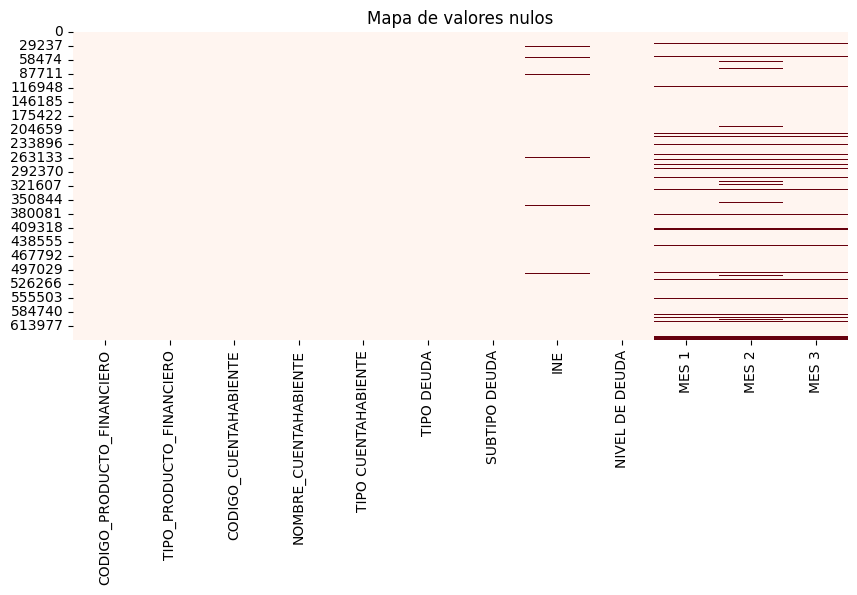

In [17]:
df = pd.read_csv("DF_CUENTAHABIENTES_TRIMESTRAL.csv", delimiter=';' )

# --- 2. Vista general de la data ---
print("\n--- Dimensiones del dataset ---")
print(df.shape)

print("\n--- Primeras filas ---")
print(df.head())

print("\n--- Info general ---")
print(df.info())

print("\n--- Estadísticas básicas ---")
print(df.describe())

print("\n--- Valores nulos por columna ---")
print(df.isnull().sum())

plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Mapa de valores nulos")
plt.show()

### 3. Transformación de datos
VAriables categóricas a numéricas para usarlas en el análisis y modelos

In [18]:
cols_mes = ["MES 1", "MES 2", "MES 3"]
label_encoders = {}

# Imputar nulos con "NA" para que LabelEncoder los tome como categoría
df[cols_mes] = df[cols_mes].fillna("NA")

for col in cols_mes:
    le = LabelEncoder()
    clean_name = col.replace(" ", "").lower() + "_enc"
    
    df[clean_name] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("\n# 🔹 Codificación")
print(df[[col for col in df.columns if "_enc" in col]].head())


# 🔹 Codificación
   mes1_enc  mes2_enc  mes3_enc
0         0         0         0
1         0         0         0
2         0         0         0
3         3         3         3
4         3         3         3


In [19]:
# ---  Variables numéricas para análisis ---
num_cols = df.select_dtypes(include=np.number).columns
print("\n# 🔹 Columnas numéricas para análisis:")
print(num_cols.tolist())


# 🔹 Columnas numéricas para análisis:
['TIPO_PRODUCTO_FINANCIERO', 'CODIGO_CUENTAHABIENTE', 'TIPO CUENTAHABIENTE', 'TIPO DEUDA', 'SUBTIPO DEUDA', 'INE', 'NIVEL DE DEUDA', 'mes1_enc', 'mes2_enc', 'mes3_enc']


### 4. Visualizar data

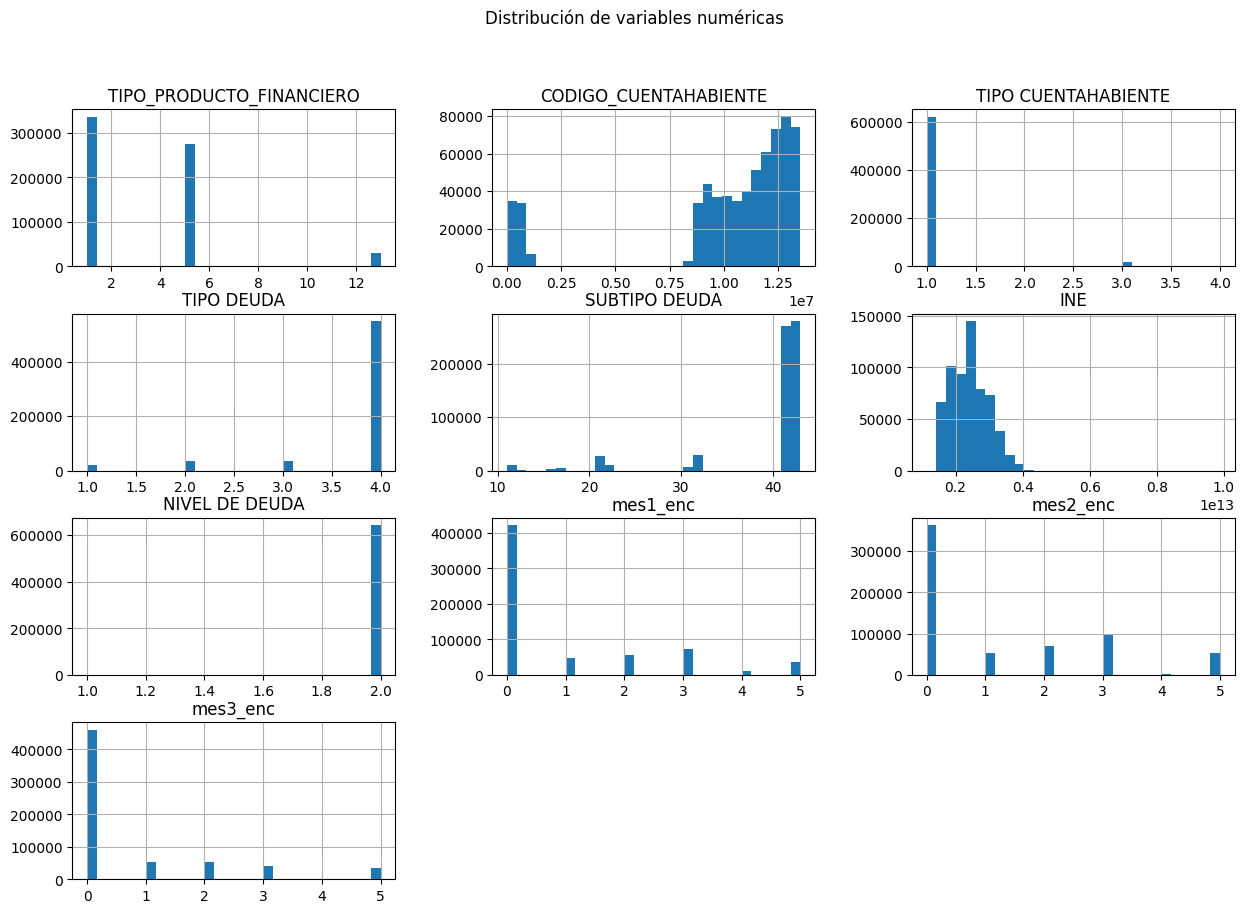

In [20]:
# --- 3. Visualización de Histogramas ---
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribución de variables numéricas")
plt.show()

### 5. Matriz de correlación

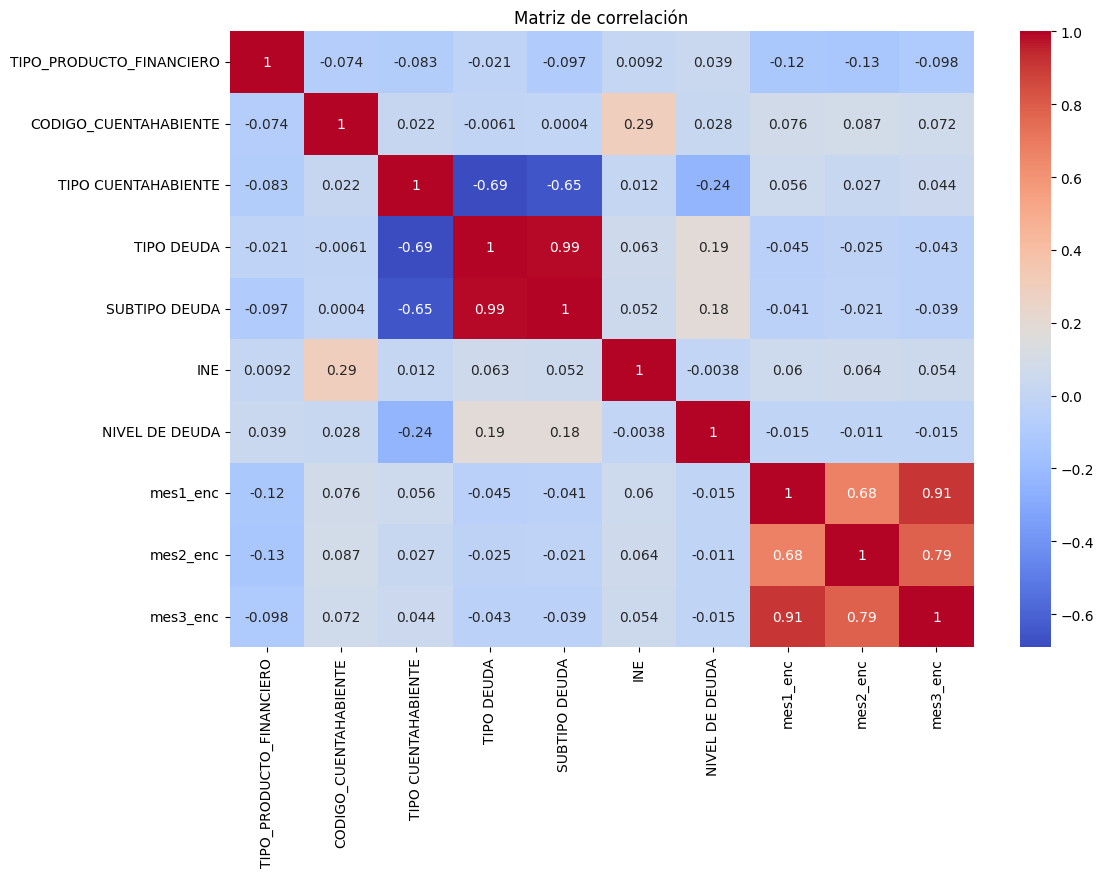

In [21]:
if len(num_cols) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Matriz de correlación")
    plt.show()

### 6. Análisis PCA

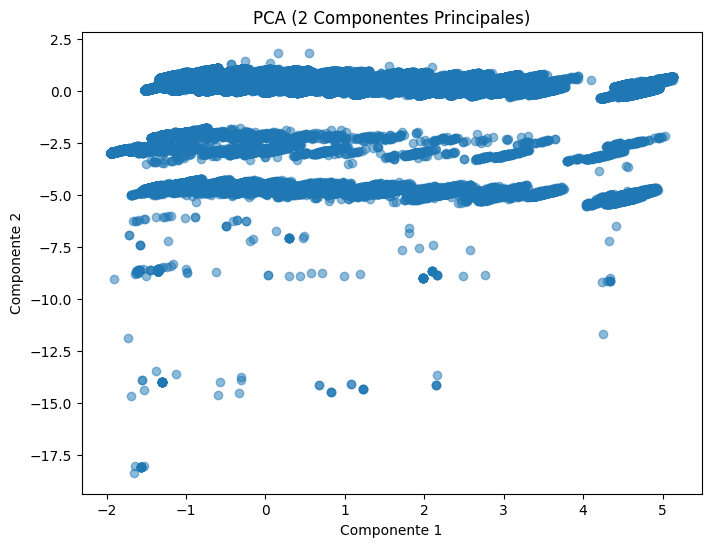

In [22]:
if len(num_cols) > 1:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[num_cols].dropna())

    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
    plt.title("PCA (2 Componentes Principales)")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()